# chewiness

   protein  target moisture  moisture     ash   carbs    fat  fiber
0  62.6988            56.85    5.3937  4.2445  20.491  6.662   0.51
1  62.6988            56.85    5.3937  4.2445  20.491  6.662   0.51
2  62.6988            57.16    5.3937  4.2445  20.491  6.662   0.51
3  63.1788            57.51    5.9137  3.9545  19.861  6.582   0.51
4  63.1788            57.24    5.9137  3.9545  19.861  6.582   0.51
   Chewiness
0  38.049816
1  31.294988
2  39.494747
3  26.862429
4  38.977081
k: 3
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12


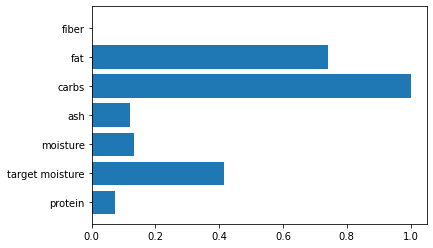

[0, 1, 2, 3, 4, 5, 6]
Number of features: 7
Features: Index(['protein', 'target moisture', 'moisture', 'ash', 'carbs', 'fat',
       'fiber'],
      dtype='object')
Root Mean Squared Error (RMSE): 11.086
Adjusted r2_score: 0.504
r2_score: 0.570
Mean absolute percentage error (MAPE): 23.7%


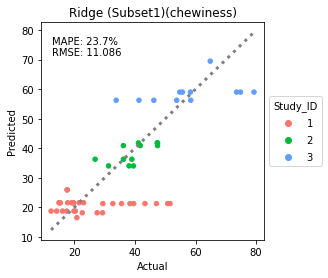

k: 5
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12


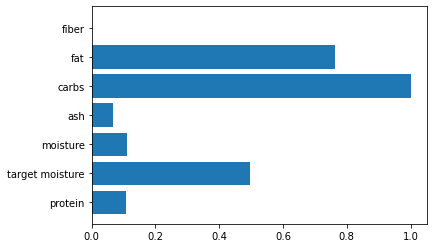

[0, 1, 2, 3, 4, 5, 6]
Number of features: 7
Features: Index(['protein', 'target moisture', 'moisture', 'ash', 'carbs', 'fat',
       'fiber'],
      dtype='object')
Root Mean Squared Error (RMSE): 11.887
Adjusted r2_score: 0.430
r2_score: 0.505
Mean absolute percentage error (MAPE): 27.2%


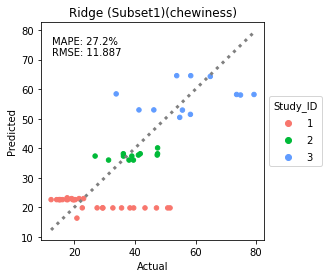

k: 7
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12


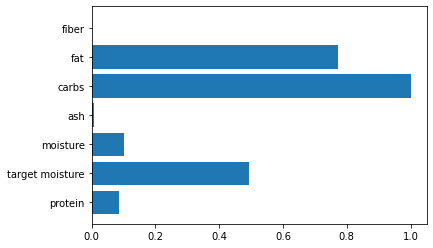

[0, 1, 2, 3, 4, 5, 6]
Number of features: 7
Features: Index(['protein', 'target moisture', 'moisture', 'ash', 'carbs', 'fat',
       'fiber'],
      dtype='object')
Root Mean Squared Error (RMSE): 13.556
Adjusted r2_score: 0.258
r2_score: 0.356
Mean absolute percentage error (MAPE): 39.5%


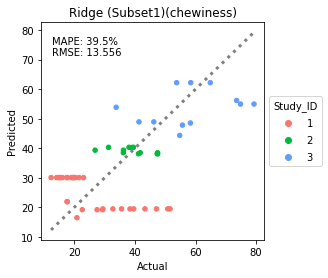

k: 9
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12


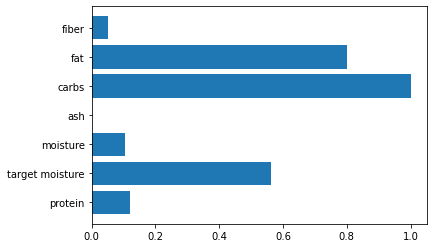

[0, 1, 2, 3, 4, 5, 6]
Number of features: 7
Features: Index(['protein', 'target moisture', 'moisture', 'ash', 'carbs', 'fat',
       'fiber'],
      dtype='object')
Root Mean Squared Error (RMSE): 15.120
Adjusted r2_score: 0.078
r2_score: 0.199
Mean absolute percentage error (MAPE): 46.0%


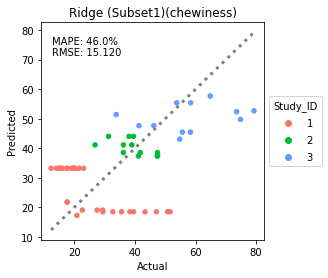

....................................................................................................
Feature: 0, Score: 0.08485
Feature: 1, Score: 0.48521
Feature: 2, Score: 0.10072
Feature: 3, Score: 0.03584
Feature: 4, Score: 1.00000
Feature: 5, Score: 0.76663
Feature: 6, Score: 0.00000


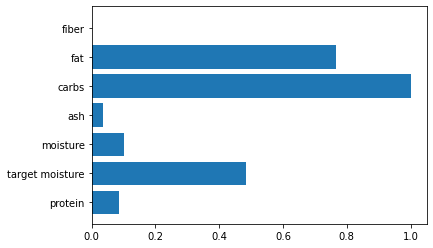

In [21]:
from sklearn.neural_network import MLPRegressor
import shap
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
    
from matplotlib.colors import ListedColormap
    
#data =pd.read_csv('./../Feature_Subsets/30_12_12.csv',header=0)
#features_all=data.iloc[:,1:8]
data =pd.read_csv('./../Feature_Subsets/additional_30_12_12.csv',header=0)
features_all=data.iloc[:,2:9]
columns = list(features_all.columns)

Subsets_Chew =[columns]

for sub_i in range(len(Subsets_Chew)):

    response = 'chewiness'
    if response=='crosswise':
        X = np.array(features_all)
       # y = np.array(features_all.iloc[:,6:7])
       # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
       # print(features_all.iloc[:,6:7].head())

    elif response=='lengthwise':
        X = np.array(features_all)
       # y = np.array(features_all.iloc[:,7:8])    
       # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
       # print(features_all.iloc[:,7:8].head())    

    elif response=='chewiness':
        #y = np.array(data.iloc[:,9:10])
        y = np.array(data.loc[:,'Chewiness'])

        print(features_all.head())
        print(data.iloc[:,10:11].head())
    elif response=='hardness':
        #y = np.array(data.iloc[:,8:9])
        y = np.array(data.loc[:,'Hardness'])
        print(features_all.head())
        print(data.iloc[:,9:10].head())        

        #estimator: 100,300,500, ..1000 (did not matter)  lambda: 1.0  max_depth: 4


    ks =[3,5,7,9] # 5
    final_importance=list()
    for n_i in ks:

        print('k:',n_i)
        feat=[columns.index(i) for i in Subsets_Chew[sub_i]]
        X = np.array(features_all.iloc[:,feat])


        y_true, predictions, residuals = list(), list(), list()
        loo = LeavePGroupsOut(n_groups=1)
        #groups = data.iloc[:,10:11].values.ravel()
        groups = list(data.Group_ID)
        study_id = data.loc[:,'Study_ID']

        print(groups)
        k_fold=loo.get_n_splits(X,groups=groups)
        print(k_fold)
        grid = dict()
        grid['sel__k'] = [i for i in range(1, X.shape[1]+1)]

        g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
        count=0
        predictions_, y_trues_ = list(), list()
        labels= list()
        importances=[]
        for train_index, test_index in loo.split(X,groups=groups):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            count += 1
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            labels.extend(study_id[test_index])

           # scaler = StandardScaler()
           # y_train = scaler.fit_transform(y_train)
           # y_test = scaler.transform(y_test)
            reg = KNeighborsRegressor(n_neighbors=n_i).fit(X_train, y_train.ravel())
          #  print(reg)
           # reg = RandomForestRegressor(random_state=0).fit(X_train, y_train.ravel())
            prediction = reg.predict(X_test)
            predictions_.extend(prediction)
            y_trues_.extend(y_test.ravel())
            #plt.barh(features_all.iloc[:,feat].columns, reg.feature_importances_)
            #plt.show()
           # residual =  y_test.ravel()-prediction
           # residuals_.append(residual)          

            results =  permutation_importance(reg, X_train, y_train.ravel(), scoring='neg_mean_squared_error')
            # get importance
           # print(results)
            importance = results.importances_mean
            x=np.abs(importance)

            importance = (x-min(x))/(max(x)-min(x))
            # summarize feature importance
            importances.append(importance)


            pred = predictions_
            true = y_trues_

        importance = np.array(importances).mean(0)
        x=np.abs(importance)

        importance = (x-min(x))/(max(x)-min(x))
        if not np.isnan(importance[0]):
            final_importance.append(importance)
      #  for i,v in enumerate(importance):
      #      print('Feature: %0d, Score: %.5f' % (i,v))
        # plot feature importance
        pyplot.barh(features_all.iloc[:,feat].columns, importance)
        pyplot.show()
        g_mse.append(mean_squared_error(true, pred))
        g_mae.append(mean_absolute_error(true, pred))
        g_rmse.append(mean_squared_error(true, pred, squared=False))
        g_mape.append(mean_absolute_percentage_error(true, pred))
        g_r2.append(r2_score(true, pred))
        g_r2adj.append(1 - (1-r2_score(true, pred))*(len(true)-1)/(len(true)-len(feat)-1))
        error =np.array(g_mse).mean()
        error2 =np.array(g_mae).mean()
        error3 =np.array(g_rmse).mean()
        error4 =  np.mean(np.abs((np.array(true) - np.array(pred))/true))*100
        r2_score_val =np.array(g_r2).mean()
        r2_adj =np.array(g_r2adj).mean()

        print(feat)
        #Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
        #A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.
        print('Number of features:',  len(feat))
        print('Features:',  features_all.columns[feat])
        #  print('Mean Squared Error (MSE): %.3f' % error) 
        #  print('Mean Absolute Error (MAE): %.3f' % error2) 
        print('Root Mean Squared Error (RMSE): %.3f' % error3) 
        print('Adjusted r2_score: %.3f' %r2_adj)
        print('r2_score: %.3f' % r2_score_val)
        print(f'Mean absolute percentage error (MAPE): {error4:.1f}%')


        error3 = mean_squared_error(true, pred, squared=False)
        r2_score_val = r2_score(true, pred)
        adj_R2=(1 - (1-r2_score_val)*(len(true)-1)/(len(true)-((7))-1))    


        fig, ax = plt.subplots(figsize=(4,4))
        plt.text(x=0.05,y=0.85,s='RMSE: %.3f' % error3, transform=ax.transAxes)
        plt.text(x=0.05,y=0.90,s=f'MAPE: {error4:.1f}%', transform=ax.transAxes)
        #plt.text(x=0.05,y=0.95,s='Adjusted R2: %.3f' % adj_R2, transform=ax.transAxes)
        #plt.text(x=0.05,y=0.90,s='R2: %.3f' % r2_score_val, transform=ax.transAxes)


        plt.title('Ridge (Subset'+str(sub_i+1)+')('+response+')')
        #ax.scatter(true, pred,labels)
        colors = ListedColormap(['#F8766D','#00BA38','#619CFF'])

        scatter=plt.scatter(true, pred,c=labels, cmap=colors,s=20)

        true=np.array(true)

        ax.plot([true.min(), true.max()], [true.min(), true.max()], linestyle = 'dotted', lw=3, color='gray')
        ax.legend(*scatter.legend_elements(),title="Study_ID", loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')

        plt.show()
    print(100*'.')
    final_importance = np.array(final_importance).mean(0)
    x=np.abs(final_importance)

    importance = (x-min(x))/(max(x)-min(x))
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.barh(features_all.iloc[:,feat].columns, importance)
    pyplot.show()

# On selected features

   protein  target moisture  moisture     ash   carbs    fat  fiber
0  62.6988            56.85    5.3937  4.2445  20.491  6.662   0.51
1  62.6988            56.85    5.3937  4.2445  20.491  6.662   0.51
2  62.6988            57.16    5.3937  4.2445  20.491  6.662   0.51
3  63.1788            57.51    5.9137  3.9545  19.861  6.582   0.51
4  63.1788            57.24    5.9137  3.9545  19.861  6.582   0.51
   Chewiness
0  38.049816
1  31.294988
2  39.494747
3  26.862429
4  38.977081
k: 3
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12
[1, 4, 5]
Number of features: 3
Features: Index(['target moisture', 'carbs', 'fat'], dtype='object')
Root Mean Squared Error (RMSE): 8.402
Adjusted r2_score: 0.738
r2_score: 0.753
Mean absolute percentage error (MAPE): 17.8%


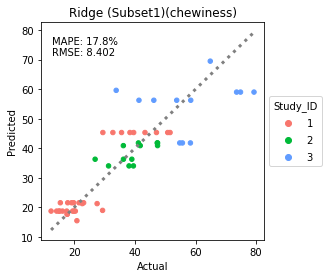

k: 5
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12
[1, 4, 5]
Number of features: 3
Features: Index(['target moisture', 'carbs', 'fat'], dtype='object')
Root Mean Squared Error (RMSE): 8.063
Adjusted r2_score: 0.759
r2_score: 0.772
Mean absolute percentage error (MAPE): 19.9%


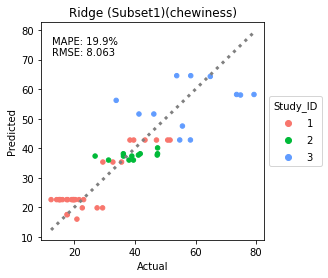

k: 7
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12
[1, 4, 5]
Number of features: 3
Features: Index(['target moisture', 'carbs', 'fat'], dtype='object')
Root Mean Squared Error (RMSE): 8.191
Adjusted r2_score: 0.751
r2_score: 0.765
Mean absolute percentage error (MAPE): 21.1%


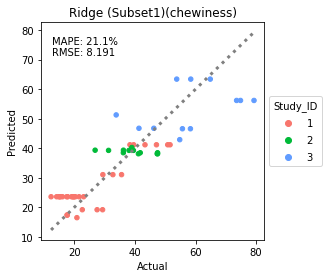

k: 9
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12
[1, 4, 5]
Number of features: 3
Features: Index(['target moisture', 'carbs', 'fat'], dtype='object')
Root Mean Squared Error (RMSE): 9.183
Adjusted r2_score: 0.687
r2_score: 0.705
Mean absolute percentage error (MAPE): 25.8%


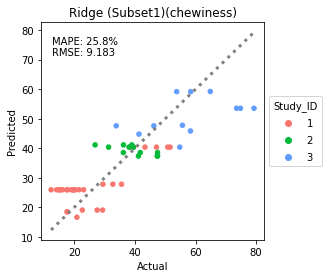

....................................................................................................
Feature: 0, Score: 0.56922
Feature: 1, Score: 1.00000
Feature: 2, Score: 0.00000


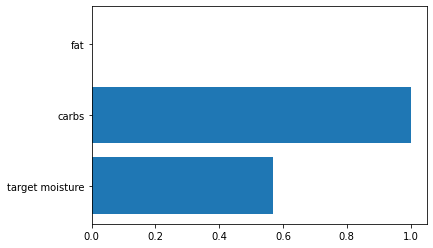

In [6]:
from sklearn.neural_network import MLPRegressor
import shap
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
    
from matplotlib.colors import ListedColormap
    
#data =pd.read_csv('./../Feature_Subsets/30_12_12.csv',header=0)
#features_all=data.iloc[:,1:8]
data =pd.read_csv('./../Feature_Subsets/additional_30_12_12.csv',header=0)
features_all=data.iloc[:,2:9]
columns = list(features_all.columns)

Subsets_Chew =[['target moisture','carbs','fat']]

for sub_i in range(len(Subsets_Chew)):

    response = 'chewiness'
    if response=='crosswise':
        X = np.array(features_all)
       # y = np.array(features_all.iloc[:,6:7])
       # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
       # print(features_all.iloc[:,6:7].head())

    elif response=='lengthwise':
        X = np.array(features_all)
       # y = np.array(features_all.iloc[:,7:8])    
       # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
       # print(features_all.iloc[:,7:8].head())    

    elif response=='chewiness':
        #y = np.array(data.iloc[:,9:10])
        y = np.array(data.loc[:,'Chewiness'])

        print(features_all.head())
        print(data.iloc[:,10:11].head())
    elif response=='hardness':
        #y = np.array(data.iloc[:,8:9])
        y = np.array(data.loc[:,'Hardness'])
        print(features_all.head())
        print(data.iloc[:,9:10].head())        

        #estimator: 100,300,500, ..1000 (did not matter)  lambda: 1.0  max_depth: 4


    ks =[3,5,7,9] # 5
    final_importance=list()
    for n_i in ks:

        print('k:',n_i)
        feat=[columns.index(i) for i in Subsets_Chew[sub_i]]
        X = np.array(features_all.iloc[:,feat])


        y_true, predictions, residuals = list(), list(), list()
        loo = LeavePGroupsOut(n_groups=1)
        #groups = data.iloc[:,10:11].values.ravel()
        groups = list(data.Group_ID)
        study_id = data.loc[:,'Study_ID']

        print(groups)
        k_fold=loo.get_n_splits(X,groups=groups)
        print(k_fold)
        grid = dict()
        grid['sel__k'] = [i for i in range(1, X.shape[1]+1)]

        g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
        count=0
        predictions_, y_trues_ = list(), list()
        labels= list()
        importances=[]
        for train_index, test_index in loo.split(X,groups=groups):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            count += 1
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            labels.extend(study_id[test_index])

           # scaler = StandardScaler()
           # y_train = scaler.fit_transform(y_train)
           # y_test = scaler.transform(y_test)
            reg = KNeighborsRegressor(n_neighbors=n_i).fit(X_train, y_train.ravel())
          #  print(reg)
           # reg = RandomForestRegressor(random_state=0).fit(X_train, y_train.ravel())
            prediction = reg.predict(X_test)
            predictions_.extend(prediction)
            y_trues_.extend(y_test.ravel())
            #plt.barh(features_all.iloc[:,feat].columns, reg.feature_importances_)
            #plt.show()
           # residual =  y_test.ravel()-prediction
           # residuals_.append(residual)          

            results =  permutation_importance(reg, X_train, y_train.ravel(), scoring='neg_mean_squared_error')
            # get importance
           # print(results)
            importance = results.importances_mean
            x=np.abs(importance)

            importance = (x-min(x))/(max(x)-min(x))
            # summarize feature importance
            importances.append(importance)


            pred = predictions_
            true = y_trues_

        importance = np.array(importances).mean(0)
        x=np.abs(importance)

        importance = (x-min(x))/(max(x)-min(x))
        if not np.isnan(importance[0]):
            final_importance.append(importance)
      #  for i,v in enumerate(importance):
      #      print('Feature: %0d, Score: %.5f' % (i,v))
        # plot feature importance
     #   pyplot.barh(features_all.iloc[:,feat].columns, importance)
     #   pyplot.show()
        g_mse.append(mean_squared_error(true, pred))
        g_mae.append(mean_absolute_error(true, pred))
        g_rmse.append(mean_squared_error(true, pred, squared=False))
        g_mape.append(mean_absolute_percentage_error(true, pred))
        g_r2.append(r2_score(true, pred))
        g_r2adj.append(1 - (1-r2_score(true, pred))*(len(true)-1)/(len(true)-len(feat)-1))
        error =np.array(g_mse).mean()
        error2 =np.array(g_mae).mean()
        error3 =np.array(g_rmse).mean()
        error4 =  np.mean(np.abs((np.array(true) - np.array(pred))/true))*100
        r2_score_val =np.array(g_r2).mean()
        r2_adj =np.array(g_r2adj).mean()

        print(feat)
        #Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
        #A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.
        print('Number of features:',  len(feat))
        print('Features:',  features_all.columns[feat])
        #  print('Mean Squared Error (MSE): %.3f' % error) 
        #  print('Mean Absolute Error (MAE): %.3f' % error2) 
        print('Root Mean Squared Error (RMSE): %.3f' % error3) 
        print('Adjusted r2_score: %.3f' %r2_adj)
        print('r2_score: %.3f' % r2_score_val)
        print(f'Mean absolute percentage error (MAPE): {error4:.1f}%')


        error3 = mean_squared_error(true, pred, squared=False)
        r2_score_val = r2_score(true, pred)
        adj_R2=(1 - (1-r2_score_val)*(len(true)-1)/(len(true)-((7))-1))    


        fig, ax = plt.subplots(figsize=(4,4))
        plt.text(x=0.05,y=0.85,s='RMSE: %.3f' % error3, transform=ax.transAxes)
        plt.text(x=0.05,y=0.90,s=f'MAPE: {error4:.1f}%', transform=ax.transAxes)
        #plt.text(x=0.05,y=0.95,s='Adjusted R2: %.3f' % adj_R2, transform=ax.transAxes)
        #plt.text(x=0.05,y=0.90,s='R2: %.3f' % r2_score_val, transform=ax.transAxes)


        plt.title('Ridge (Subset'+str(sub_i+1)+')('+response+')')
        #ax.scatter(true, pred,labels)
        colors = ListedColormap(['#F8766D','#00BA38','#619CFF'])

        scatter=plt.scatter(true, pred,c=labels, cmap=colors,s=20)

        true=np.array(true)

        ax.plot([true.min(), true.max()], [true.min(), true.max()], linestyle = 'dotted', lw=3, color='gray')
        ax.legend(*scatter.legend_elements(),title="Study_ID", loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')

        plt.show()
    print(100*'.')
    final_importance = np.array(final_importance).mean(0)
    x=np.abs(final_importance)

    importance = (x-min(x))/(max(x)-min(x))
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.barh(features_all.iloc[:,feat].columns, importance)
    pyplot.show()

# hardness

   protein  target moisture  moisture     ash   carbs    fat  fiber
0  62.6988            56.85    5.3937  4.2445  20.491  6.662   0.51
1  62.6988            56.85    5.3937  4.2445  20.491  6.662   0.51
2  62.6988            57.16    5.3937  4.2445  20.491  6.662   0.51
3  63.1788            57.51    5.9137  3.9545  19.861  6.582   0.51
4  63.1788            57.24    5.9137  3.9545  19.861  6.582   0.51
   Hardness
0   46.7090
1   40.4365
2   49.0595
3   38.6525
4   50.8115
k: 2
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12


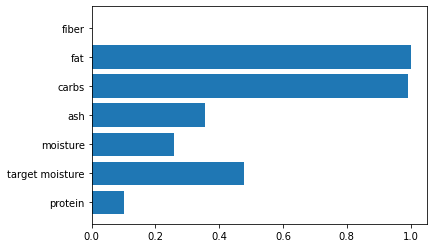

[0, 1, 2, 3, 4, 5, 6]
Number of features: 7
Features: Index(['protein', 'target moisture', 'moisture', 'ash', 'carbs', 'fat',
       'fiber'],
      dtype='object')
Root Mean Squared Error (RMSE): 14.967
Adjusted r2_score: 0.482
r2_score: 0.551
Mean absolute percentage error (MAPE): 24.2%


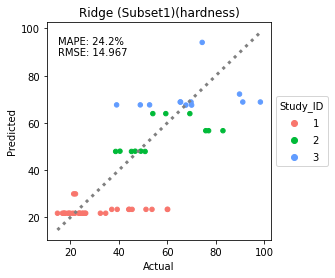

k: 3
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12


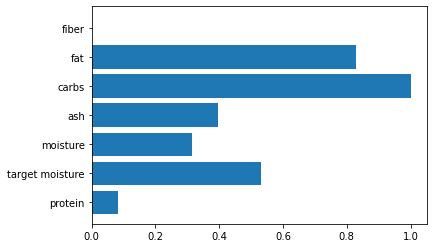

[0, 1, 2, 3, 4, 5, 6]
Number of features: 7
Features: Index(['protein', 'target moisture', 'moisture', 'ash', 'carbs', 'fat',
       'fiber'],
      dtype='object')
Root Mean Squared Error (RMSE): 14.236
Adjusted r2_score: 0.532
r2_score: 0.593
Mean absolute percentage error (MAPE): 25.8%


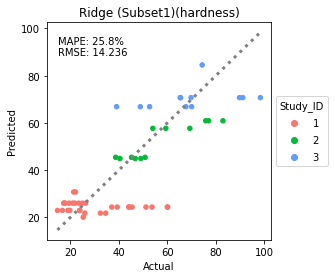

k: 5
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12


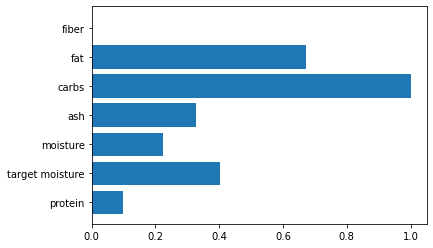

[0, 1, 2, 3, 4, 5, 6]
Number of features: 7
Features: Index(['protein', 'target moisture', 'moisture', 'ash', 'carbs', 'fat',
       'fiber'],
      dtype='object')
Root Mean Squared Error (RMSE): 15.504
Adjusted r2_score: 0.445
r2_score: 0.518
Mean absolute percentage error (MAPE): 29.5%


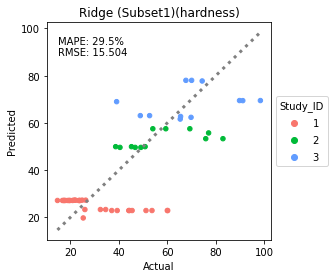

k: 7
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12


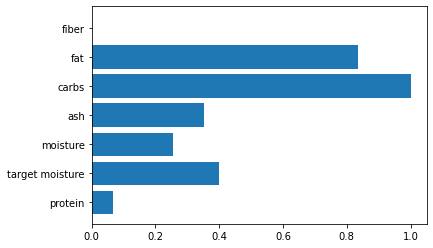

[0, 1, 2, 3, 4, 5, 6]
Number of features: 7
Features: Index(['protein', 'target moisture', 'moisture', 'ash', 'carbs', 'fat',
       'fiber'],
      dtype='object')
Root Mean Squared Error (RMSE): 17.848
Adjusted r2_score: 0.264
r2_score: 0.361
Mean absolute percentage error (MAPE): 43.6%


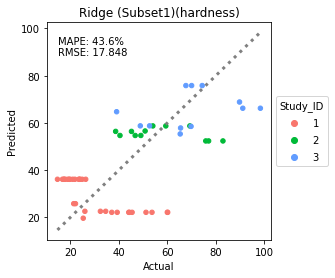

k: 9
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12


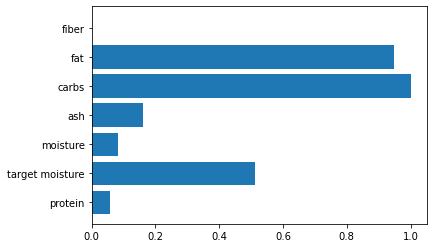

[0, 1, 2, 3, 4, 5, 6]
Number of features: 7
Features: Index(['protein', 'target moisture', 'moisture', 'ash', 'carbs', 'fat',
       'fiber'],
      dtype='object')
Root Mean Squared Error (RMSE): 21.552
Adjusted r2_score: -0.073
r2_score: 0.068
Mean absolute percentage error (MAPE): 58.6%


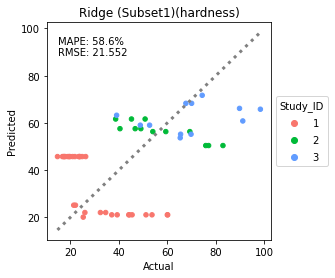

k: 10
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12


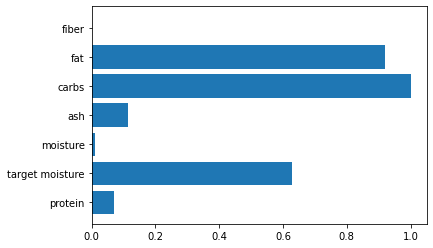

[0, 1, 2, 3, 4, 5, 6]
Number of features: 7
Features: Index(['protein', 'target moisture', 'moisture', 'ash', 'carbs', 'fat',
       'fiber'],
      dtype='object')
Root Mean Squared Error (RMSE): 22.720
Adjusted r2_score: -0.193
r2_score: -0.035
Mean absolute percentage error (MAPE): 63.3%


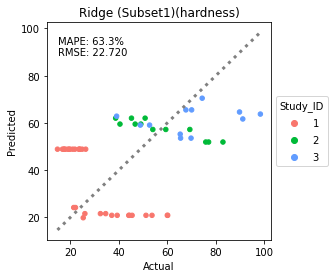

....................................................................................................
Feature: 0, Score: 0.07966
Feature: 1, Score: 0.49231
Feature: 2, Score: 0.19059
Feature: 3, Score: 0.28460
Feature: 4, Score: 1.00000
Feature: 5, Score: 0.86859
Feature: 6, Score: 0.00000


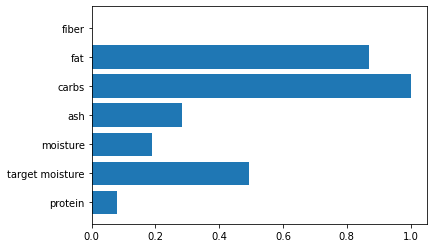

In [7]:
from sklearn.neural_network import MLPRegressor
import shap
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
    
from matplotlib.colors import ListedColormap
    
#data =pd.read_csv('./../Feature_Subsets/30_12_12.csv',header=0)
#features_all=data.iloc[:,1:8]
data =pd.read_csv('./../Feature_Subsets/additional_30_12_12.csv',header=0)
features_all=data.iloc[:,2:9]
columns = list(features_all.columns)

Subsets_Chew =[columns]

for sub_i in range(len(Subsets_Chew)):

    response = 'hardness'
    if response=='crosswise':
        X = np.array(features_all)
       # y = np.array(features_all.iloc[:,6:7])
       # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
       # print(features_all.iloc[:,6:7].head())

    elif response=='lengthwise':
        X = np.array(features_all)
       # y = np.array(features_all.iloc[:,7:8])    
       # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
       # print(features_all.iloc[:,7:8].head())    

    elif response=='chewiness':
        #y = np.array(data.iloc[:,9:10])
        y = np.array(data.loc[:,'Chewiness'])

        print(features_all.head())
        print(data.iloc[:,10:11].head())
    elif response=='hardness':
        #y = np.array(data.iloc[:,8:9])
        y = np.array(data.loc[:,'Hardness'])
        print(features_all.head())
        print(data.iloc[:,9:10].head())        

        #estimator: 100,300,500, ..1000 (did not matter)  lambda: 1.0  max_depth: 4


    ks =[3,5,7,9] # 5
    final_importance=list()
    for n_i in ks:

        print('k:',n_i)
        feat=[columns.index(i) for i in Subsets_Chew[sub_i]]
        X = np.array(features_all.iloc[:,feat])


        y_true, predictions, residuals = list(), list(), list()
        loo = LeavePGroupsOut(n_groups=1)
        #groups = data.iloc[:,10:11].values.ravel()
        groups = list(data.Group_ID)
        study_id = data.loc[:,'Study_ID']

        print(groups)
        k_fold=loo.get_n_splits(X,groups=groups)
        print(k_fold)
        grid = dict()
        grid['sel__k'] = [i for i in range(1, X.shape[1]+1)]

        g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
        count=0
        predictions_, y_trues_ = list(), list()
        labels= list()
        importances=[]
        for train_index, test_index in loo.split(X,groups=groups):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            count += 1
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            labels.extend(study_id[test_index])

           # scaler = StandardScaler()
           # y_train = scaler.fit_transform(y_train)
           # y_test = scaler.transform(y_test)
            reg = KNeighborsRegressor(n_neighbors=n_i).fit(X_train, y_train.ravel())
          #  print(reg)
           # reg = RandomForestRegressor(random_state=0).fit(X_train, y_train.ravel())
            prediction = reg.predict(X_test)
            predictions_.extend(prediction)
            y_trues_.extend(y_test.ravel())
            #plt.barh(features_all.iloc[:,feat].columns, reg.feature_importances_)
            #plt.show()
           # residual =  y_test.ravel()-prediction
           # residuals_.append(residual)          

            results =  permutation_importance(reg, X_train, y_train.ravel(), scoring='neg_mean_squared_error')
            # get importance
           # print(results)
            importance = results.importances_mean
            x=np.abs(importance)

            importance = (x-min(x))/(max(x)-min(x))
            # summarize feature importance
            importances.append(importance)


            pred = predictions_
            true = y_trues_

        importance = np.array(importances).mean(0)
        x=np.abs(importance)

        importance = (x-min(x))/(max(x)-min(x))
        if not np.isnan(importance[0]):
            final_importance.append(importance)
      #  for i,v in enumerate(importance):
      #      print('Feature: %0d, Score: %.5f' % (i,v))
        # plot feature importance
        pyplot.barh(features_all.iloc[:,feat].columns, importance)
        pyplot.show()
        g_mse.append(mean_squared_error(true, pred))
        g_mae.append(mean_absolute_error(true, pred))
        g_rmse.append(mean_squared_error(true, pred, squared=False))
        g_mape.append(mean_absolute_percentage_error(true, pred))
        g_r2.append(r2_score(true, pred))
        g_r2adj.append(1 - (1-r2_score(true, pred))*(len(true)-1)/(len(true)-len(feat)-1))
        error =np.array(g_mse).mean()
        error2 =np.array(g_mae).mean()
        error3 =np.array(g_rmse).mean()
        error4 =  np.mean(np.abs((np.array(true) - np.array(pred))/true))*100
        r2_score_val =np.array(g_r2).mean()
        r2_adj =np.array(g_r2adj).mean()

        print(feat)
        #Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
        #A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.
        print('Number of features:',  len(feat))
        print('Features:',  features_all.columns[feat])
        #  print('Mean Squared Error (MSE): %.3f' % error) 
        #  print('Mean Absolute Error (MAE): %.3f' % error2) 
        print('Root Mean Squared Error (RMSE): %.3f' % error3) 
        print('Adjusted r2_score: %.3f' %r2_adj)
        print('r2_score: %.3f' % r2_score_val)
        print(f'Mean absolute percentage error (MAPE): {error4:.1f}%')


        error3 = mean_squared_error(true, pred, squared=False)
        r2_score_val = r2_score(true, pred)
        adj_R2=(1 - (1-r2_score_val)*(len(true)-1)/(len(true)-((7))-1))    


        fig, ax = plt.subplots(figsize=(4,4))
        plt.text(x=0.05,y=0.85,s='RMSE: %.3f' % error3, transform=ax.transAxes)
        plt.text(x=0.05,y=0.90,s=f'MAPE: {error4:.1f}%', transform=ax.transAxes)
        #plt.text(x=0.05,y=0.95,s='Adjusted R2: %.3f' % adj_R2, transform=ax.transAxes)
        #plt.text(x=0.05,y=0.90,s='R2: %.3f' % r2_score_val, transform=ax.transAxes)


        plt.title('Ridge (Subset'+str(sub_i+1)+')('+response+')')
        #ax.scatter(true, pred,labels)
        colors = ListedColormap(['#F8766D','#00BA38','#619CFF'])

        scatter=plt.scatter(true, pred,c=labels, cmap=colors,s=20)

        true=np.array(true)

        ax.plot([true.min(), true.max()], [true.min(), true.max()], linestyle = 'dotted', lw=3, color='gray')
        ax.legend(*scatter.legend_elements(),title="Study_ID", loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')

        plt.show()
    print(100*'.')
    final_importance = np.array(final_importance).mean(0)
    x=np.abs(final_importance)

    importance = (x-min(x))/(max(x)-min(x))
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.barh(features_all.iloc[:,feat].columns, importance)
    pyplot.show()

# On selected features

   protein  target moisture  moisture     ash   carbs    fat  fiber
0  62.6988            56.85    5.3937  4.2445  20.491  6.662   0.51
1  62.6988            56.85    5.3937  4.2445  20.491  6.662   0.51
2  62.6988            57.16    5.3937  4.2445  20.491  6.662   0.51
3  63.1788            57.51    5.9137  3.9545  19.861  6.582   0.51
4  63.1788            57.24    5.9137  3.9545  19.861  6.582   0.51
   Hardness
0   46.7090
1   40.4365
2   49.0595
3   38.6525
4   50.8115
k: 3
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12
[1, 4, 5]
Number of features: 3
Features: Index(['target moisture', 'carbs', 'fat'], dtype='object')
Root Mean Squared Error (RMSE): 16.037
Adjusted r2_score: 0.453
r2_score: 0.484
Mean absolute percentage error (MAPE): 26.6%


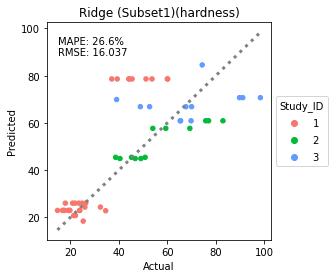

k: 5
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12
[1, 4, 5]
Number of features: 3
Features: Index(['target moisture', 'carbs', 'fat'], dtype='object')
Root Mean Squared Error (RMSE): 13.254
Adjusted r2_score: 0.626
r2_score: 0.648
Mean absolute percentage error (MAPE): 26.6%


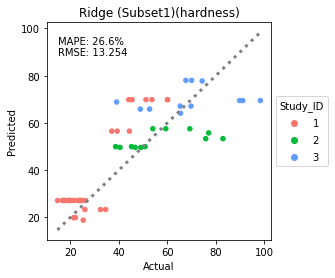

k: 7
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12
[1, 4, 5]
Number of features: 3
Features: Index(['target moisture', 'carbs', 'fat'], dtype='object')
Root Mean Squared Error (RMSE): 12.678
Adjusted r2_score: 0.658
r2_score: 0.678
Mean absolute percentage error (MAPE): 27.3%


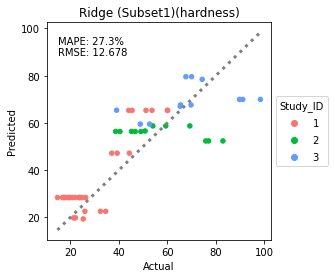

k: 9
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12
[1, 4, 5]
Number of features: 3
Features: Index(['target moisture', 'carbs', 'fat'], dtype='object')
Root Mean Squared Error (RMSE): 13.321
Adjusted r2_score: 0.623
r2_score: 0.644
Mean absolute percentage error (MAPE): 31.0%


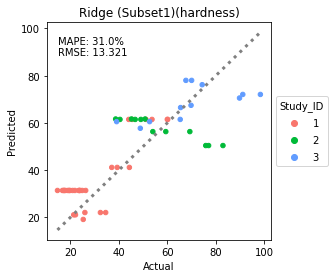

....................................................................................................
Feature: 0, Score: 0.00000
Feature: 1, Score: 1.00000
Feature: 2, Score: 0.56144


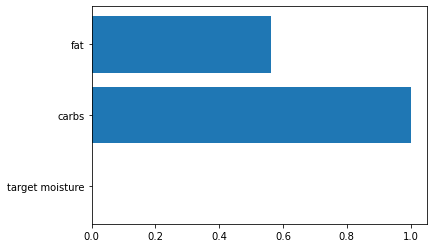

In [8]:
from sklearn.neural_network import MLPRegressor
import shap
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
    
from matplotlib.colors import ListedColormap
    
#data =pd.read_csv('./../Feature_Subsets/30_12_12.csv',header=0)
#features_all=data.iloc[:,1:8]
data =pd.read_csv('./../Feature_Subsets/additional_30_12_12.csv',header=0)
features_all=data.iloc[:,2:9]
columns = list(features_all.columns)

Subsets_Chew =[['target moisture','carbs','fat']]

for sub_i in range(len(Subsets_Chew)):

    response = 'hardness'
    if response=='crosswise':
        X = np.array(features_all)
       # y = np.array(features_all.iloc[:,6:7])
       # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
       # print(features_all.iloc[:,6:7].head())

    elif response=='lengthwise':
        X = np.array(features_all)
       # y = np.array(features_all.iloc[:,7:8])    
       # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
       # print(features_all.iloc[:,7:8].head())    

    elif response=='chewiness':
        #y = np.array(data.iloc[:,9:10])
        y = np.array(data.loc[:,'Chewiness'])

        print(features_all.head())
        print(data.iloc[:,10:11].head())
    elif response=='hardness':
        #y = np.array(data.iloc[:,8:9])
        y = np.array(data.loc[:,'Hardness'])
        print(features_all.head())
        print(data.iloc[:,9:10].head())        

        #estimator: 100,300,500, ..1000 (did not matter)  lambda: 1.0  max_depth: 4


    ks =[3,5,7,9] # 5
    final_importance=list()
    for n_i in ks:

        print('k:',n_i)
        feat=[columns.index(i) for i in Subsets_Chew[sub_i]]
        X = np.array(features_all.iloc[:,feat])


        y_true, predictions, residuals = list(), list(), list()
        loo = LeavePGroupsOut(n_groups=1)
        #groups = data.iloc[:,10:11].values.ravel()
        groups = list(data.Group_ID)
        study_id = data.loc[:,'Study_ID']

        print(groups)
        k_fold=loo.get_n_splits(X,groups=groups)
        print(k_fold)
        grid = dict()
        grid['sel__k'] = [i for i in range(1, X.shape[1]+1)]

        g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
        count=0
        predictions_, y_trues_ = list(), list()
        labels= list()
        importances=[]
        for train_index, test_index in loo.split(X,groups=groups):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            count += 1
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            labels.extend(study_id[test_index])

           # scaler = StandardScaler()
           # y_train = scaler.fit_transform(y_train)
           # y_test = scaler.transform(y_test)

            reg = KNeighborsRegressor(n_neighbors=n_i).fit(X_train, y_train.ravel())
          #  print(reg)
           # reg = RandomForestRegressor(random_state=0).fit(X_train, y_train.ravel())
            prediction = reg.predict(X_test)
            predictions_.extend(prediction)
            y_trues_.extend(y_test.ravel())
            #plt.barh(features_all.iloc[:,feat].columns, reg.feature_importances_)
            #plt.show()
           # residual =  y_test.ravel()-prediction
           # residuals_.append(residual)          

            results =  permutation_importance(reg, X_train, y_train.ravel(), scoring='neg_mean_squared_error')
            # get importance
           # print(results)
            importance = results.importances_mean
            x=np.abs(importance)

            importance = (x-min(x))/(max(x)-min(x))
            # summarize feature importance
            importances.append(importance)


            pred = predictions_
            true = y_trues_

        importance = np.array(importances).mean(0)
        x=np.abs(importance)

        importance = (x-min(x))/(max(x)-min(x))
        if not np.isnan(importance[0]):
            final_importance.append(importance)
      #  for i,v in enumerate(importance):
      #      print('Feature: %0d, Score: %.5f' % (i,v))
        # plot feature importance
     #   pyplot.barh(features_all.iloc[:,feat].columns, importance)
     #   pyplot.show()
        g_mse.append(mean_squared_error(true, pred))
        g_mae.append(mean_absolute_error(true, pred))
        g_rmse.append(mean_squared_error(true, pred, squared=False))
        g_mape.append(mean_absolute_percentage_error(true, pred))
        g_r2.append(r2_score(true, pred))
        g_r2adj.append(1 - (1-r2_score(true, pred))*(len(true)-1)/(len(true)-len(feat)-1))
        error =np.array(g_mse).mean()
        error2 =np.array(g_mae).mean()
        error3 =np.array(g_rmse).mean()
        error4 =  np.mean(np.abs((np.array(true) - np.array(pred))/true))*100
        r2_score_val =np.array(g_r2).mean()
        r2_adj =np.array(g_r2adj).mean()

        print(feat)
        #Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
        #A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.
        print('Number of features:',  len(feat))
        print('Features:',  features_all.columns[feat])
        #  print('Mean Squared Error (MSE): %.3f' % error) 
        #  print('Mean Absolute Error (MAE): %.3f' % error2) 
        print('Root Mean Squared Error (RMSE): %.3f' % error3) 
        print('Adjusted r2_score: %.3f' %r2_adj)
        print('r2_score: %.3f' % r2_score_val)
        print(f'Mean absolute percentage error (MAPE): {error4:.1f}%')


        error3 = mean_squared_error(true, pred, squared=False)
        r2_score_val = r2_score(true, pred)
        adj_R2=(1 - (1-r2_score_val)*(len(true)-1)/(len(true)-((7))-1))    


        fig, ax = plt.subplots(figsize=(4,4))
        plt.text(x=0.05,y=0.85,s='RMSE: %.3f' % error3, transform=ax.transAxes)
        plt.text(x=0.05,y=0.90,s=f'MAPE: {error4:.1f}%', transform=ax.transAxes)
        #plt.text(x=0.05,y=0.95,s='Adjusted R2: %.3f' % adj_R2, transform=ax.transAxes)
        #plt.text(x=0.05,y=0.90,s='R2: %.3f' % r2_score_val, transform=ax.transAxes)


        plt.title('Ridge (Subset'+str(sub_i+1)+')('+response+')')
        #ax.scatter(true, pred,labels)
        colors = ListedColormap(['#F8766D','#00BA38','#619CFF'])

        scatter=plt.scatter(true, pred,c=labels, cmap=colors,s=20)

        true=np.array(true)

        ax.plot([true.min(), true.max()], [true.min(), true.max()], linestyle = 'dotted', lw=3, color='gray')
        ax.legend(*scatter.legend_elements(),title="Study_ID", loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')

        plt.show()
    print(100*'.')
    final_importance = np.array(final_importance).mean(0)
    x=np.abs(final_importance)

    importance = (x-min(x))/(max(x)-min(x))
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.barh(features_all.iloc[:,feat].columns, importance)
    pyplot.show()